# Poem: Logistic Regression

For this project, the text is the feature and the label is the date of the poem.

We use logistic regression for a multi-class text classification task.

With no preprocessing, the model has 304 targets. We will present the results of different models depending on the preprocessing.

In [ ]:
# If you do not have stopwords
import nltk
nltk.download("stopwords")


# 🎓 Library

In [3]:
# Misc
import os
import numpy as np
import pandas as pd
import pickle

# Training
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

DATA = "data/"

if not os.path.exists(DATA):
    raise FileNotFoundError(f"Data directory {DATA} does not exist. Please create it and add the data files.")

In [4]:
poems_df = pd.read_parquet(DATA + "de_poems.parquet")

In [5]:
poems_df.head(3)["text"].values

array(['Gebohrn, und wiederumb, o Mensch, gebohren werden,\nErrettet dich vom Tod und hilfft dir in Beschwerden.',
       'Es suchte niemand Gott, liegt er gleich unterm Leben,\nWär er nicht Lieb und hätt es nicht mit Lieb umbgeben.',
       'Die ist in Gott, und Gott der ist zugleich in Ihr,\nIn der ich leb, und die auch wieder lebt in mir.'],
      dtype=object)

# Preprocessing & Hyperparameter Tuning

In [6]:
# Transform all date to centuries, else we have 304 classes
from env import get_period
poems = poems_df.copy()

poems["creation"] = poems["creation"].astype(int)

# For model A
poems["century"] = poems["creation"].apply(lambda x: str(x// 100 + 1))

# For model B
poems["movement"] = poems["creation"].apply(lambda x: get_period(x))

In [7]:
german_stop_words = stopwords.words("german")

vectorizer = TfidfVectorizer(stop_words=german_stop_words)

x = vectorizer.fit_transform(poems["text"])
# y will be defined depending on the model

In [8]:
param_grid = [
    {
        "penalty": ["l1", "l2"],
        "solver" : ["saga", "sag", "lbfgs"],
        "max_iter": [100, 500]
    }
]

# Model A: Per Century

Each poem is mapped to a century.

Our feature is `text`, and the label is `creation`.

We encode only the features.

## Step 1: Preprocessing

In [48]:
y = poems["century"]

In [49]:
print(f"Currently have {len(poems)} poems with {len(y.unique())} dates.")
print(f"Model has {len(vectorizer.get_feature_names_out())} features.")

Currently have 71570 poems with 8 dates.
Model has 318755 features.


## Step 2: Data splitting and model training

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((57256, 318755), (14314, 318755), (57256,), (14314,))

In [ ]:
century_model = LogisticRegression(random_state = 42, solver = "saga", verbose = 10)

clf = GridSearchCV(century_model, param_grid, n_jobs = -1,cv = 3, verbose = True)

In [53]:
clf.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1, change: 1
Epoch 2, change: 0.20023941
Epoch 3, change: 0.11756307
Epoch 4, change: 0.083047283
Epoch 5, change: 0.060363492
Epoch 6, change: 0.052754127
Epoch 7, change: 0.0405223
Epoch 8, change: 0.034807273
Epoch 9, change: 0.032740037
Epoch 10, change: 0.027516361
Epoch 11, change: 0.026269991
Epoch 12, change: 0.023972835
Epoch 13, change: 0.022729772
Epoch 14, change: 0.020485566
Epoch 15, change: 0.018862181
Epoch 16, change: 0.017615011
Epoch 17, change: 0.017457267
Epoch 18, change: 0.017081234
Epoch 19, change: 0.015996799
Epoch 20, change: 0.016031518
Epoch 21, change: 0.015597412
Epoch 22, change: 0.015186067
Epoch 23, change: 0.015125931
Epoch 24, change: 0.014716616
Epoch 25, change: 0.014581779
Epoch 26, change: 0.0139627
Epoch 27, change: 0.013953988
Epoch 28, change: 0.013452825
Epoch 29, change: 0.013023252
Epoch 30, change: 0.012757754
Epoch 31, change: 0.012638005
Epoch 32, change: 0.012332183
Epoc

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   44.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   44.0s


Epoch 1, change: 1
Epoch 2, change: 0.22515398
Epoch 3, change: 0.108874
Epoch 4, change: 0.073233899
Epoch 5, change: 0.063299675
Epoch 6, change: 0.057385728
Epoch 7, change: 0.045610752
Epoch 8, change: 0.036243663
Epoch 9, change: 0.032349701
Epoch 10, change: 0.0301714
Epoch 11, change: 0.026273223
Epoch 12, change: 0.023006105
Epoch 13, change: 0.020092113
Epoch 14, change: 0.01701913
Epoch 15, change: 0.015099745
Epoch 16, change: 0.014823201
Epoch 17, change: 0.014418507
Epoch 18, change: 0.014131994
Epoch 19, change: 0.013736207
Epoch 20, change: 0.013448777
Epoch 21, change: 0.013197087
Epoch 22, change: 0.013135641
Epoch 23, change: 0.012760339
Epoch 24, change: 0.01263264
Epoch 25, change: 0.012538708
Epoch 26, change: 0.011876043
Epoch 27, change: 0.011869546
Epoch 28, change: 0.011596197
Epoch 29, change: 0.011580886
Epoch 30, change: 0.011258616
Epoch 31, change: 0.011032219
Epoch 32, change: 0.010897784
Epoch 33, change: 0.010802391
Epoch 34, change: 0.010752633
Epoch 3

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   43.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   43.0s


Epoch 1, change: 1
Epoch 2, change: 0.19961011
Epoch 3, change: 0.12262545
Epoch 4, change: 0.082563209
Epoch 5, change: 0.059454715
Epoch 6, change: 0.058850776
Epoch 7, change: 0.047846238
Epoch 8, change: 0.041190587
Epoch 9, change: 0.031913007
Epoch 10, change: 0.02590717
Epoch 11, change: 0.024254362
Epoch 12, change: 0.02106355
Epoch 13, change: 0.017517842
Epoch 14, change: 0.016503277
Epoch 15, change: 0.013577525
Epoch 16, change: 0.01247901
Epoch 17, change: 0.011560233
Epoch 18, change: 0.011225933
Epoch 19, change: 0.010240408
Epoch 20, change: 0.010056396
Epoch 21, change: 0.0099868688
Epoch 22, change: 0.0098890372
Epoch 23, change: 0.0098120136
Epoch 24, change: 0.0097151375
Epoch 25, change: 0.0096700268
Epoch 26, change: 0.0095458912
Epoch 27, change: 0.00950927
Epoch 28, change: 0.0094452092
Epoch 29, change: 0.0094256017
Epoch 30, change: 0.0092782465
Epoch 31, change: 0.0092334128
Epoch 32, change: 0.0091709612
Epoch 33, change: 0.0091534634
Epoch 34, change: 0.009

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   46.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   46.0s


Epoch 1, change: 1
Epoch 2, change: 0.19550803
Epoch 3, change: 0.1197876
Epoch 4, change: 0.069938654
Epoch 5, change: 0.048732265
Epoch 6, change: 0.058778645
Epoch 7, change: 0.04952687
Epoch 8, change: 0.045884057
Epoch 9, change: 0.019210678
Epoch 10, change: 0.015063524
Epoch 11, change: 0.011056884
Epoch 12, change: 0.007376327
Epoch 13, change: 0.0036015435
Epoch 14, change: 0.0034517603
Epoch 15, change: 0.0021338104
Epoch 16, change: 0.0034062214
Epoch 17, change: 0.0007070867
Epoch 18, change: 0.00073645844
Epoch 19, change: 0.00056381872
Epoch 20, change: 0.00031879353
Epoch 21, change: 0.00013444566
Epoch 22, change: 0.00016357808
convergence after 23 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s


Epoch 1, change: 1
Epoch 2, change: 0.16499108
Epoch 3, change: 0.10902101
Epoch 4, change: 0.066829732
Epoch 5, change: 0.058863334
Epoch 6, change: 0.045024881
Epoch 7, change: 0.040045764
Epoch 8, change: 0.046713424
Epoch 9, change: 0.069493819
Epoch 10, change: 0.011762732
Epoch 11, change: 0.0067694843
Epoch 12, change: 0.0076166154
Epoch 13, change: 0.0068115304
Epoch 14, change: 0.0082250291
Epoch 15, change: 0.0017748059
Epoch 16, change: 0.0013665281
Epoch 17, change: 0.0013835841
Epoch 18, change: 0.00097844984
Epoch 19, change: 0.00053161538
Epoch 20, change: 0.00017795967
Epoch 21, change: 0.00044366486
Epoch 22, change: 0.0001876543
Epoch 23, change: 0.00012862072
Epoch 24, change: 0.00010102405
convergence after 25 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s


Epoch 1, change: 1
Epoch 2, change: 0.1795794
Epoch 3, change: 0.11831166
Epoch 4, change: 0.072384734
Epoch 5, change: 0.06002702
Epoch 6, change: 0.060016079
Epoch 7, change: 0.046831799
Epoch 8, change: 0.044559708
Epoch 9, change: 0.075037405
Epoch 10, change: 0.019155624
Epoch 11, change: 0.007553623
Epoch 12, change: 0.020874647
Epoch 13, change: 0.0099035254
Epoch 14, change: 0.0052704707
Epoch 15, change: 0.0015235353
Epoch 16, change: 0.0042986033
Epoch 17, change: 0.00079744484
Epoch 18, change: 0.00058153235
Epoch 19, change: 0.00080013966
Epoch 20, change: 0.00023843172
Epoch 21, change: 0.0012991715
Epoch 22, change: 0.00016741829
Epoch 23, change: 0.00011319916
Epoch 24, change: 0.00013202684
convergence after 25 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s


Epoch 1, change: 1
Epoch 2, change: 0.2547463
Epoch 3, change: 0.15272783
Epoch 4, change: 0.077001681
Epoch 5, change: 0.050815958
Epoch 6, change: 0.060791843
Epoch 7, change: 0.052967486
Epoch 8, change: 0.044704451
Epoch 9, change: 0.028743475
Epoch 10, change: 0.013024383
Epoch 11, change: 0.011811327
Epoch 12, change: 0.0049815135
Epoch 13, change: 0.0028403933
Epoch 14, change: 0.001730715
Epoch 15, change: 0.0014653844
Epoch 16, change: 0.0031578339
Epoch 17, change: 0.00081114994
Epoch 18, change: 0.00060991439
Epoch 19, change: 0.00036791131
Epoch 20, change: 0.00022678787
Epoch 21, change: 0.00010544603
Epoch 22, change: 0.00028386485
convergence after 23 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s


Epoch 1, change: 1
Epoch 2, change: 0.31393739
Epoch 3, change: 0.12637201
Epoch 4, change: 0.074016685
Epoch 5, change: 0.057348204
Epoch 6, change: 0.039510974
Epoch 7, change: 0.043486934
Epoch 8, change: 0.040933114
Epoch 9, change: 0.07413623
Epoch 10, change: 0.018132558
Epoch 11, change: 0.020754488
Epoch 12, change: 0.0066811815
Epoch 13, change: 0.0042137103
Epoch 14, change: 0.0024134534
Epoch 15, change: 0.0013024158
Epoch 16, change: 0.0015738726
Epoch 17, change: 0.00056561586
Epoch 18, change: 0.00031582461
Epoch 19, change: 0.00027223821
Epoch 20, change: 0.00017290935
convergence after 21 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s


Epoch 1, change: 1
Epoch 2, change: 0.40764271
Epoch 3, change: 0.14202562
Epoch 4, change: 0.10550255
Epoch 5, change: 0.078157702
Epoch 6, change: 0.054221723
Epoch 7, change: 0.045252974
Epoch 8, change: 0.048096497
Epoch 9, change: 0.079943485
Epoch 10, change: 0.016944794
Epoch 11, change: 0.017028167
Epoch 12, change: 0.01856172
Epoch 13, change: 0.0073891674
Epoch 14, change: 0.0024457804
Epoch 15, change: 0.0011367015
Epoch 16, change: 0.0055969532
Epoch 17, change: 0.00098119157
Epoch 18, change: 0.00033089338
Epoch 19, change: 0.00023958829
Epoch 20, change: 0.00029254617
Epoch 21, change: 0.00021242781
convergence after 22 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   47.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   47.2s
/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the numb

Epoch 1, change: 1
Epoch 2, change: 0.20023941
Epoch 3, change: 0.11756307
Epoch 4, change: 0.083047283
Epoch 5, change: 0.060363492
Epoch 6, change: 0.052754127
Epoch 7, change: 0.0405223
Epoch 8, change: 0.034807273
Epoch 9, change: 0.032740037
Epoch 10, change: 0.027516361
Epoch 11, change: 0.026269991
Epoch 12, change: 0.023972835
Epoch 13, change: 0.022729772
Epoch 14, change: 0.020485566
Epoch 15, change: 0.018862181
Epoch 16, change: 0.017615011
Epoch 17, change: 0.017457267
Epoch 18, change: 0.017081234
Epoch 19, change: 0.015996799
Epoch 20, change: 0.016031518
Epoch 21, change: 0.015597412
Epoch 22, change: 0.015186067
Epoch 23, change: 0.015125931
Epoch 24, change: 0.014716616
Epoch 25, change: 0.014581779
Epoch 26, change: 0.0139627
Epoch 27, change: 0.013953988
Epoch 28, change: 0.013452825
Epoch 29, change: 0.013023252
Epoch 30, change: 0.012757754
Epoch 31, change: 0.012638005
Epoch 32, change: 0.012332183
Epoch 33, change: 0.011762974
Epoch 34, change: 0.011682223
Epoch

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.7min


Epoch 1, change: 1
Epoch 2, change: 0.22515398
Epoch 3, change: 0.108874
Epoch 4, change: 0.073233899
Epoch 5, change: 0.063299675
Epoch 6, change: 0.057385728
Epoch 7, change: 0.045610752
Epoch 8, change: 0.036243663
Epoch 9, change: 0.032349701
Epoch 10, change: 0.0301714
Epoch 11, change: 0.026273223
Epoch 12, change: 0.023006105
Epoch 13, change: 0.020092113
Epoch 14, change: 0.01701913
Epoch 15, change: 0.015099745
Epoch 16, change: 0.014823201
Epoch 17, change: 0.014418507
Epoch 18, change: 0.014131994
Epoch 19, change: 0.013736207
Epoch 20, change: 0.013448777
Epoch 21, change: 0.013197087
Epoch 22, change: 0.013135641
Epoch 23, change: 0.012760339
Epoch 24, change: 0.01263264
Epoch 25, change: 0.012538708
Epoch 26, change: 0.011876043
Epoch 27, change: 0.011869546
Epoch 28, change: 0.011596197
Epoch 29, change: 0.011580886
Epoch 30, change: 0.011258616
Epoch 31, change: 0.011032219
Epoch 32, change: 0.010897784
Epoch 33, change: 0.010802391
Epoch 34, change: 0.010752633
Epoch 3

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.5min


Epoch 1, change: 1
Epoch 2, change: 0.19961011
Epoch 3, change: 0.12262545
Epoch 4, change: 0.082563209
Epoch 5, change: 0.059454715
Epoch 6, change: 0.058850776
Epoch 7, change: 0.047846238
Epoch 8, change: 0.041190587
Epoch 9, change: 0.031913007
Epoch 10, change: 0.02590717
Epoch 11, change: 0.024254362
Epoch 12, change: 0.02106355
Epoch 13, change: 0.017517842
Epoch 14, change: 0.016503277
Epoch 15, change: 0.013577525
Epoch 16, change: 0.01247901
Epoch 17, change: 0.011560233
Epoch 18, change: 0.011225933
Epoch 19, change: 0.010240408
Epoch 20, change: 0.010056396
Epoch 21, change: 0.0099868688
Epoch 22, change: 0.0098890372
Epoch 23, change: 0.0098120136
Epoch 24, change: 0.0097151375
Epoch 25, change: 0.0096700268
Epoch 26, change: 0.0095458912
Epoch 27, change: 0.00950927
Epoch 28, change: 0.0094452092
Epoch 29, change: 0.0094256017
Epoch 30, change: 0.0092782465
Epoch 31, change: 0.0092334128
Epoch 32, change: 0.0091709612
Epoch 33, change: 0.0091534634
Epoch 34, change: 0.009

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.6min


Epoch 1, change: 1
Epoch 2, change: 0.19550803
Epoch 3, change: 0.1197876
Epoch 4, change: 0.069938654
Epoch 5, change: 0.048732265
Epoch 6, change: 0.058778645
Epoch 7, change: 0.04952687
Epoch 8, change: 0.045884057
Epoch 9, change: 0.019210678
Epoch 10, change: 0.015063524
Epoch 11, change: 0.011056884
Epoch 12, change: 0.007376327
Epoch 13, change: 0.0036015435
Epoch 14, change: 0.0034517603
Epoch 15, change: 0.0021338104
Epoch 16, change: 0.0034062214
Epoch 17, change: 0.0007070867
Epoch 18, change: 0.00073645844
Epoch 19, change: 0.00056381872
Epoch 20, change: 0.00031879353
Epoch 21, change: 0.00013444566
Epoch 22, change: 0.00016357808
convergence after 23 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s


Epoch 1, change: 1
Epoch 2, change: 0.16499108
Epoch 3, change: 0.10902101
Epoch 4, change: 0.066829732
Epoch 5, change: 0.058863334
Epoch 6, change: 0.045024881
Epoch 7, change: 0.040045764
Epoch 8, change: 0.046713424
Epoch 9, change: 0.069493819
Epoch 10, change: 0.011762732
Epoch 11, change: 0.0067694843
Epoch 12, change: 0.0076166154
Epoch 13, change: 0.0068115304
Epoch 14, change: 0.0082250291
Epoch 15, change: 0.0017748059
Epoch 16, change: 0.0013665281
Epoch 17, change: 0.0013835841
Epoch 18, change: 0.00097844984
Epoch 19, change: 0.00053161538
Epoch 20, change: 0.00017795967
Epoch 21, change: 0.00044366486
Epoch 22, change: 0.0001876543
Epoch 23, change: 0.00012862072
Epoch 24, change: 0.00010102405
convergence after 25 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s


Epoch 1, change: 1
Epoch 2, change: 0.1795794
Epoch 3, change: 0.11831166
Epoch 4, change: 0.072384734
Epoch 5, change: 0.06002702
Epoch 6, change: 0.060016079
Epoch 7, change: 0.046831799
Epoch 8, change: 0.044559708
Epoch 9, change: 0.075037405
Epoch 10, change: 0.019155624
Epoch 11, change: 0.007553623
Epoch 12, change: 0.020874647
Epoch 13, change: 0.0099035254
Epoch 14, change: 0.0052704707
Epoch 15, change: 0.0015235353
Epoch 16, change: 0.0042986033
Epoch 17, change: 0.00079744484
Epoch 18, change: 0.00058153235
Epoch 19, change: 0.00080013966
Epoch 20, change: 0.00023843172
Epoch 21, change: 0.0012991715
Epoch 22, change: 0.00016741829
Epoch 23, change: 0.00011319916
Epoch 24, change: 0.00013202684
convergence after 25 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s


Epoch 1, change: 1
Epoch 2, change: 0.2547463
Epoch 3, change: 0.15272783
Epoch 4, change: 0.077001681
Epoch 5, change: 0.050815958
Epoch 6, change: 0.060791843
Epoch 7, change: 0.052967486
Epoch 8, change: 0.044704451
Epoch 9, change: 0.028743475
Epoch 10, change: 0.013024383
Epoch 11, change: 0.011811327
Epoch 12, change: 0.0049815135
Epoch 13, change: 0.0028403933
Epoch 14, change: 0.001730715
Epoch 15, change: 0.0014653844
Epoch 16, change: 0.0031578339
Epoch 17, change: 0.00081114994
Epoch 18, change: 0.00060991439
Epoch 19, change: 0.00036791131
Epoch 20, change: 0.00022678787
Epoch 21, change: 0.00010544603
Epoch 22, change: 0.00028386485
convergence after 23 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s


Epoch 1, change: 1
Epoch 2, change: 0.31393739
Epoch 3, change: 0.12637201
Epoch 4, change: 0.074016685
Epoch 5, change: 0.057348204
Epoch 6, change: 0.039510974
Epoch 7, change: 0.043486934
Epoch 8, change: 0.040933114
Epoch 9, change: 0.07413623
Epoch 10, change: 0.018132558
Epoch 11, change: 0.020754488
Epoch 12, change: 0.0066811815
Epoch 13, change: 0.0042137103
Epoch 14, change: 0.0024134534
Epoch 15, change: 0.0013024158
Epoch 16, change: 0.0015738726
Epoch 17, change: 0.00056561586
Epoch 18, change: 0.00031582461
Epoch 19, change: 0.00027223821
Epoch 20, change: 0.00017290935
convergence after 21 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s


Epoch 1, change: 1
Epoch 2, change: 0.40764271
Epoch 3, change: 0.14202562
Epoch 4, change: 0.10550255
Epoch 5, change: 0.078157702
Epoch 6, change: 0.054221723
Epoch 7, change: 0.045252974
Epoch 8, change: 0.048096497
Epoch 9, change: 0.079943485
Epoch 10, change: 0.016944794
Epoch 11, change: 0.017028167
Epoch 12, change: 0.01856172
Epoch 13, change: 0.0073891674
Epoch 14, change: 0.0024457804
Epoch 15, change: 0.0011367015
Epoch 16, change: 0.0055969532
Epoch 17, change: 0.00098119157
Epoch 18, change: 0.00033089338
Epoch 19, change: 0.00023958829
Epoch 20, change: 0.00029254617
Epoch 21, change: 0.00021242781
convergence after 22 epochs took 3 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.0min
/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Tracebac

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=42, solver='saga',
                                          verbose=10),
             n_jobs=1,
             param_grid=[{'max_iter': [100, 500], 'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'sag', 'lbfgs']}],
             verbose=True)

In [54]:
century_model = clf.best_estimator_
century_model

LogisticRegression(random_state=42, verbose=10)

In [55]:
century_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 10,
 'warm_start': False}

#### Quick save

In [62]:
pickle.dump(century_model, open("trained/LR_Century_model.pkl", "wb"))

## Step 3: Evaluation and finetuning

In [57]:
y_pred = century_model.predict(x_test)

In [58]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

          11       0.33      0.02      0.03        55
          13       0.00      0.00      0.00        18
          14       0.96      0.48      0.64       189
          16       0.99      0.68      0.80       210
          17       0.92      0.92      0.92      4032
          18       0.86      0.64      0.73      2880
          19       0.79      0.96      0.86      6476
          20       0.94      0.07      0.12       454

    accuracy                           0.84     14314
   macro avg       0.72      0.47      0.51     14314
weighted avg       0.85      0.84      0.82     14314



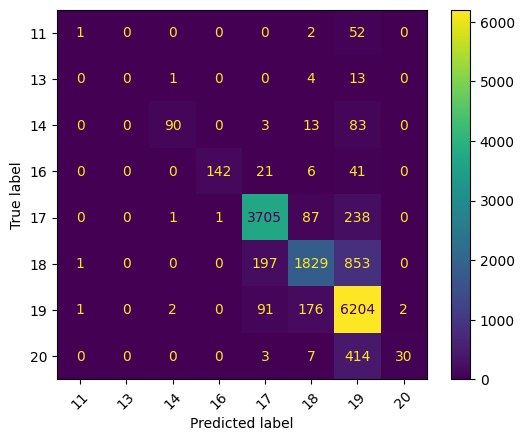

In [59]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

heat = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=century_model.classes_)
fig, ax = plt.subplots()  # optional: adjust figure size
heat.plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

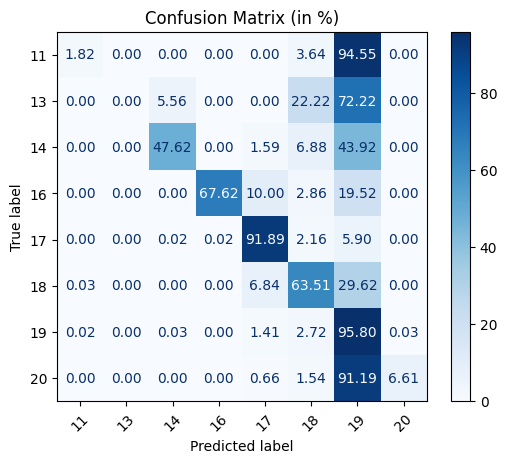

In [60]:
# Normalize it (row-wise percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=century_model.classes_)
disp.plot(cmap='Blues', values_format='.2f')  # values_format to control decimal places
plt.title('Confusion Matrix (in %)')
plt.xticks(rotation=45)
plt.show()


In [61]:
# Compare the results with the actual y values
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


# Model B: Per Movement
Each poem is mapped to a German literary movement.

## Step 1: Preprocessing

In [9]:
y = poems["movement"]

In [10]:
print(f"Currently have {len(poems)} poems with {len(y.unique())} movements.")
print(f"Model has {len(vectorizer.get_feature_names_out())} features.")

Currently have 71570 poems with 9 movements.
Model has 318755 features.


## Step 2: Data splitting and model training

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((57256, 318755), (14314, 318755), (57256,), (14314,))

In [15]:
movement_model = LogisticRegression(random_state=42, solver="saga", verbose=10)

clf = GridSearchCV(movement_model, param_grid, n_jobs=1, cv=3, verbose=True)

In [16]:
clf.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Epoch 1, change: 1
Epoch 2, change: 0.21046561
Epoch 3, change: 0.10539805
Epoch 4, change: 0.07104572
Epoch 5, change: 0.054389292
Epoch 6, change: 0.044148173
Epoch 7, change: 0.040416245
Epoch 8, change: 0.03694719
Epoch 9, change: 0.034449873
Epoch 10, change: 0.028476439
Epoch 11, change: 0.027310395
Epoch 12, change: 0.024456448
Epoch 13, change: 0.022720033
Epoch 14, change: 0.020139492
Epoch 15, change: 0.018872014
Epoch 16, change: 0.016628249
Epoch 17, change: 0.015575654
Epoch 18, change: 0.01442352
Epoch 19, change: 0.013313567
Epoch 20, change: 0.01161345
Epoch 21, change: 0.011263796
Epoch 22, change: 0.0099929537
Epoch 23, change: 0.0099036854
Epoch 24, change: 0.0093182006
Epoch 25, change: 0.009106657
Epoch 26, change: 0.0086734338
Epoch 27, change: 0.0082849511
Epoch 28, change: 0.0079219766
Epoch 29, change: 0.0074700344
Epoch 30, change: 0.0070710785
Epoch 31, change: 0.0070380757
Epoch 32, change: 0.00672

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.9s


Epoch 1, change: 1
Epoch 2, change: 0.2203393
Epoch 3, change: 0.11246173
Epoch 4, change: 0.075242915
Epoch 5, change: 0.066292139
Epoch 6, change: 0.048477292
Epoch 7, change: 0.040881748
Epoch 8, change: 0.032173557
Epoch 9, change: 0.02317533
Epoch 10, change: 0.019659488
Epoch 11, change: 0.018229201
Epoch 12, change: 0.015988707
Epoch 13, change: 0.013374896
Epoch 14, change: 0.012652347
Epoch 15, change: 0.0119534
Epoch 16, change: 0.011734945
Epoch 17, change: 0.011294689
Epoch 18, change: 0.010851025
Epoch 19, change: 0.010461143
Epoch 20, change: 0.0099432375
Epoch 21, change: 0.0096761507
Epoch 22, change: 0.0094962076
Epoch 23, change: 0.0090601768
Epoch 24, change: 0.0086267929
Epoch 25, change: 0.0085885248
Epoch 26, change: 0.0077930123
Epoch 27, change: 0.007707888
Epoch 28, change: 0.0072463291
Epoch 29, change: 0.0072615471
Epoch 30, change: 0.0068574177
Epoch 31, change: 0.0064830027
Epoch 32, change: 0.0063658155
Epoch 33, change: 0.0061595884
Epoch 34, change: 0.00

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   58.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   58.6s


Epoch 1, change: 1
Epoch 2, change: 0.20764212
Epoch 3, change: 0.11820122
Epoch 4, change: 0.077236821
Epoch 5, change: 0.061655762
Epoch 6, change: 0.048048641
Epoch 7, change: 0.045788827
Epoch 8, change: 0.041323442
Epoch 9, change: 0.028837345
Epoch 10, change: 0.023340586
Epoch 11, change: 0.022623708
Epoch 12, change: 0.019385777
Epoch 13, change: 0.016508322
Epoch 14, change: 0.014968151
Epoch 15, change: 0.014288079
Epoch 16, change: 0.012254885
Epoch 17, change: 0.012543267
Epoch 18, change: 0.012065696
Epoch 19, change: 0.01091063
Epoch 20, change: 0.01002877
Epoch 21, change: 0.0095316818
Epoch 22, change: 0.0087585125
Epoch 23, change: 0.0082843735
Epoch 24, change: 0.0082307531
Epoch 25, change: 0.0077686463
Epoch 26, change: 0.0076239536
Epoch 27, change: 0.0061899681
Epoch 28, change: 0.0066592778
Epoch 29, change: 0.0065238267
Epoch 30, change: 0.0060115244
Epoch 31, change: 0.0059962611
Epoch 32, change: 0.0053952515
Epoch 33, change: 0.005467783
Epoch 34, change: 0.0

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.0s


Epoch 1, change: 1
Epoch 2, change: 0.19675111
Epoch 3, change: 0.099542851
Epoch 4, change: 0.078365542
Epoch 5, change: 0.073290207
Epoch 6, change: 0.08590915
Epoch 7, change: 0.053479461
Epoch 8, change: 0.043722384
Epoch 9, change: 0.02623064
Epoch 10, change: 0.013895028
Epoch 11, change: 0.0091553133
Epoch 12, change: 0.012054153
Epoch 13, change: 0.0050918761
Epoch 14, change: 0.0047797813
Epoch 15, change: 0.0015359836
Epoch 16, change: 0.0015268044
Epoch 17, change: 0.0017286095
Epoch 18, change: 0.0008854681
Epoch 19, change: 0.00052381574
Epoch 20, change: 0.00037499007
Epoch 21, change: 0.00013469609
Epoch 22, change: 0.00013552382
convergence after 23 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s


Epoch 1, change: 1
Epoch 2, change: 0.16002809
Epoch 3, change: 0.095167923
Epoch 4, change: 0.068577582
Epoch 5, change: 0.05910038
Epoch 6, change: 0.043372089
Epoch 7, change: 0.043185991
Epoch 8, change: 0.050159813
Epoch 9, change: 0.071182071
Epoch 10, change: 0.012380685
Epoch 11, change: 0.0082001626
Epoch 12, change: 0.012019027
Epoch 13, change: 0.0084597837
Epoch 14, change: 0.0029187246
Epoch 15, change: 0.0028798569
Epoch 16, change: 0.0017693453
Epoch 17, change: 0.00067915243
Epoch 18, change: 0.00036953868
Epoch 19, change: 0.0011405617
Epoch 20, change: 0.00030445521
Epoch 21, change: 0.0002723143
Epoch 22, change: 0.00016384302
Epoch 23, change: 0.00010044695
convergence after 24 epochs took 5 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s


Epoch 1, change: 1
Epoch 2, change: 0.18874221
Epoch 3, change: 0.12523176
Epoch 4, change: 0.079906423
Epoch 5, change: 0.058498095
Epoch 6, change: 0.047417407
Epoch 7, change: 0.049935629
Epoch 8, change: 0.041630038
Epoch 9, change: 0.069886651
Epoch 10, change: 0.019440723
Epoch 11, change: 0.0099753075
Epoch 12, change: 0.024068047
Epoch 13, change: 0.0089878476
Epoch 14, change: 0.0031137231
Epoch 15, change: 0.002472076
Epoch 16, change: 0.0047213422
Epoch 17, change: 0.0018144509
Epoch 18, change: 0.00077750081
Epoch 19, change: 0.00063962174
Epoch 20, change: 0.00026038768
Epoch 21, change: 0.0014770238
Epoch 22, change: 0.00011644164
Epoch 23, change: 0.00011634298
convergence after 24 epochs took 5 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s


Epoch 1, change: 1
Epoch 2, change: 0.21205136
Epoch 3, change: 0.13863895
Epoch 4, change: 0.079156585
Epoch 5, change: 0.059643844
Epoch 6, change: 0.087338722
Epoch 7, change: 0.055355824
Epoch 8, change: 0.042733666
Epoch 9, change: 0.03403942
Epoch 10, change: 0.015195135
Epoch 11, change: 0.011968426
Epoch 12, change: 0.0041186706
Epoch 13, change: 0.0022437619
Epoch 14, change: 0.0042652981
Epoch 15, change: 0.0017163437
Epoch 16, change: 0.0018383139
Epoch 17, change: 0.00079103984
Epoch 18, change: 0.00039214142
Epoch 19, change: 0.00024844575
convergence after 20 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s


Epoch 1, change: 1
Epoch 2, change: 0.251565
Epoch 3, change: 0.14501602
Epoch 4, change: 0.077195985
Epoch 5, change: 0.061255417
Epoch 6, change: 0.044269156
Epoch 7, change: 0.047363133
Epoch 8, change: 0.051132943
Epoch 9, change: 0.072411185
Epoch 10, change: 0.016506414
Epoch 11, change: 0.019226691
Epoch 12, change: 0.011982922
Epoch 13, change: 0.0083461211
Epoch 14, change: 0.0028008641
Epoch 15, change: 0.0015126706
Epoch 16, change: 0.0023779429
Epoch 17, change: 0.0017533791
Epoch 18, change: 0.00039031423
Epoch 19, change: 0.00073633849
Epoch 20, change: 0.00024193882
Epoch 21, change: 0.00014037462
convergence after 22 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s


Epoch 1, change: 1
Epoch 2, change: 0.31036527
Epoch 3, change: 0.13012508
Epoch 4, change: 0.082804975
Epoch 5, change: 0.063105763
Epoch 6, change: 0.051615547
Epoch 7, change: 0.051399763
Epoch 8, change: 0.041633338
Epoch 9, change: 0.07156095
Epoch 10, change: 0.020689389
Epoch 11, change: 0.013117946
Epoch 12, change: 0.021303218
Epoch 13, change: 0.0084798773
Epoch 14, change: 0.0022670395
Epoch 15, change: 0.0018100738
Epoch 16, change: 0.0059744036
Epoch 17, change: 0.0022581608
Epoch 18, change: 0.00052771256
Epoch 19, change: 0.00028382746
Epoch 20, change: 0.00015305608
Epoch 21, change: 0.00012502344
convergence after 22 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   47.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   47.7s
/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the numb

Epoch 1, change: 1
Epoch 2, change: 0.21046561
Epoch 3, change: 0.10539805
Epoch 4, change: 0.07104572
Epoch 5, change: 0.054389292
Epoch 6, change: 0.044148173
Epoch 7, change: 0.040416245
Epoch 8, change: 0.03694719
Epoch 9, change: 0.034449873
Epoch 10, change: 0.028476439
Epoch 11, change: 0.027310395
Epoch 12, change: 0.024456448
Epoch 13, change: 0.022720033
Epoch 14, change: 0.020139492
Epoch 15, change: 0.018872014
Epoch 16, change: 0.016628249
Epoch 17, change: 0.015575654
Epoch 18, change: 0.01442352
Epoch 19, change: 0.013313567
Epoch 20, change: 0.01161345
Epoch 21, change: 0.011263796
Epoch 22, change: 0.0099929537
Epoch 23, change: 0.0099036854
Epoch 24, change: 0.0093182006
Epoch 25, change: 0.009106657
Epoch 26, change: 0.0086734338
Epoch 27, change: 0.0082849511
Epoch 28, change: 0.0079219766
Epoch 29, change: 0.0074700344
Epoch 30, change: 0.0070710785
Epoch 31, change: 0.0070380757
Epoch 32, change: 0.0067291688
Epoch 33, change: 0.0061066667
Epoch 34, change: 0.0060

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  4.9min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  4.9min


Epoch 1, change: 1
Epoch 2, change: 0.2203393
Epoch 3, change: 0.11246173
Epoch 4, change: 0.075242915
Epoch 5, change: 0.066292139
Epoch 6, change: 0.048477292
Epoch 7, change: 0.040881748
Epoch 8, change: 0.032173557
Epoch 9, change: 0.02317533
Epoch 10, change: 0.019659488
Epoch 11, change: 0.018229201
Epoch 12, change: 0.015988707
Epoch 13, change: 0.013374896
Epoch 14, change: 0.012652347
Epoch 15, change: 0.0119534
Epoch 16, change: 0.011734945
Epoch 17, change: 0.011294689
Epoch 18, change: 0.010851025
Epoch 19, change: 0.010461143
Epoch 20, change: 0.0099432375
Epoch 21, change: 0.0096761507
Epoch 22, change: 0.0094962076
Epoch 23, change: 0.0090601768
Epoch 24, change: 0.0086267929
Epoch 25, change: 0.0085885248
Epoch 26, change: 0.0077930123
Epoch 27, change: 0.007707888
Epoch 28, change: 0.0072463291
Epoch 29, change: 0.0072615471
Epoch 30, change: 0.0068574177
Epoch 31, change: 0.0064830027
Epoch 32, change: 0.0063658155
Epoch 33, change: 0.0061595884
Epoch 34, change: 0.00

/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  5.0min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  5.0min


Epoch 1, change: 1
Epoch 2, change: 0.20764212
Epoch 3, change: 0.11820122
Epoch 4, change: 0.077236821
Epoch 5, change: 0.061655762
Epoch 6, change: 0.048048641
Epoch 7, change: 0.045788827
Epoch 8, change: 0.041323442
Epoch 9, change: 0.028837345
Epoch 10, change: 0.023340586
Epoch 11, change: 0.022623708
Epoch 12, change: 0.019385777
Epoch 13, change: 0.016508322
Epoch 14, change: 0.014968151
Epoch 15, change: 0.014288079
Epoch 16, change: 0.012254885
Epoch 17, change: 0.012543267
Epoch 18, change: 0.012065696
Epoch 19, change: 0.01091063
Epoch 20, change: 0.01002877
Epoch 21, change: 0.0095316818
Epoch 22, change: 0.0087585125
Epoch 23, change: 0.0082843735
Epoch 24, change: 0.0082307531
Epoch 25, change: 0.0077686463
Epoch 26, change: 0.0076239536
Epoch 27, change: 0.0061899681
Epoch 28, change: 0.0066592778
Epoch 29, change: 0.0065238267
Epoch 30, change: 0.0060115244
Epoch 31, change: 0.0059962611
Epoch 32, change: 0.0053952515
Epoch 33, change: 0.005467783
Epoch 34, change: 0.0

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.6min


Epoch 1, change: 1
Epoch 2, change: 0.19675111
Epoch 3, change: 0.099542851
Epoch 4, change: 0.078365542
Epoch 5, change: 0.073290207
Epoch 6, change: 0.08590915
Epoch 7, change: 0.053479461
Epoch 8, change: 0.043722384
Epoch 9, change: 0.02623064
Epoch 10, change: 0.013895028
Epoch 11, change: 0.0091553133
Epoch 12, change: 0.012054153
Epoch 13, change: 0.0050918761
Epoch 14, change: 0.0047797813
Epoch 15, change: 0.0015359836
Epoch 16, change: 0.0015268044
Epoch 17, change: 0.0017286095
Epoch 18, change: 0.0008854681
Epoch 19, change: 0.00052381574
Epoch 20, change: 0.00037499007
Epoch 21, change: 0.00013469609
Epoch 22, change: 0.00013552382
convergence after 23 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s


Epoch 1, change: 1
Epoch 2, change: 0.16002809
Epoch 3, change: 0.095167923
Epoch 4, change: 0.068577582
Epoch 5, change: 0.05910038
Epoch 6, change: 0.043372089
Epoch 7, change: 0.043185991
Epoch 8, change: 0.050159813
Epoch 9, change: 0.071182071
Epoch 10, change: 0.012380685
Epoch 11, change: 0.0082001626
Epoch 12, change: 0.012019027
Epoch 13, change: 0.0084597837
Epoch 14, change: 0.0029187246
Epoch 15, change: 0.0028798569
Epoch 16, change: 0.0017693453
Epoch 17, change: 0.00067915243
Epoch 18, change: 0.00036953868
Epoch 19, change: 0.0011405617
Epoch 20, change: 0.00030445521
Epoch 21, change: 0.0002723143
Epoch 22, change: 0.00016384302
Epoch 23, change: 0.00010044695
convergence after 24 epochs took 5 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s


Epoch 1, change: 1
Epoch 2, change: 0.18874221
Epoch 3, change: 0.12523176
Epoch 4, change: 0.079906423
Epoch 5, change: 0.058498095
Epoch 6, change: 0.047417407
Epoch 7, change: 0.049935629
Epoch 8, change: 0.041630038
Epoch 9, change: 0.069886651
Epoch 10, change: 0.019440723
Epoch 11, change: 0.0099753075
Epoch 12, change: 0.024068047
Epoch 13, change: 0.0089878476
Epoch 14, change: 0.0031137231
Epoch 15, change: 0.002472076
Epoch 16, change: 0.0047213422
Epoch 17, change: 0.0018144509
Epoch 18, change: 0.00077750081
Epoch 19, change: 0.00063962174
Epoch 20, change: 0.00026038768
Epoch 21, change: 0.0014770238
Epoch 22, change: 0.00011644164
Epoch 23, change: 0.00011634298
convergence after 24 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s


Epoch 1, change: 1
Epoch 2, change: 0.21205136
Epoch 3, change: 0.13863895
Epoch 4, change: 0.079156585
Epoch 5, change: 0.059643844
Epoch 6, change: 0.087338722
Epoch 7, change: 0.055355824
Epoch 8, change: 0.042733666
Epoch 9, change: 0.03403942
Epoch 10, change: 0.015195135
Epoch 11, change: 0.011968426
Epoch 12, change: 0.0041186706
Epoch 13, change: 0.0022437619
Epoch 14, change: 0.0042652981
Epoch 15, change: 0.0017163437
Epoch 16, change: 0.0018383139
Epoch 17, change: 0.00079103984
Epoch 18, change: 0.00039214142
Epoch 19, change: 0.00024844575
convergence after 20 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s


Epoch 1, change: 1
Epoch 2, change: 0.251565
Epoch 3, change: 0.14501602
Epoch 4, change: 0.077195985
Epoch 5, change: 0.061255417
Epoch 6, change: 0.044269156
Epoch 7, change: 0.047363133
Epoch 8, change: 0.051132943
Epoch 9, change: 0.072411185
Epoch 10, change: 0.016506414
Epoch 11, change: 0.019226691
Epoch 12, change: 0.011982922
Epoch 13, change: 0.0083461211
Epoch 14, change: 0.0028008641
Epoch 15, change: 0.0015126706
Epoch 16, change: 0.0023779429
Epoch 17, change: 0.0017533791
Epoch 18, change: 0.00039031423
Epoch 19, change: 0.00073633849
Epoch 20, change: 0.00024193882
Epoch 21, change: 0.00014037462
convergence after 22 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s


Epoch 1, change: 1
Epoch 2, change: 0.31036527
Epoch 3, change: 0.13012508
Epoch 4, change: 0.082804975
Epoch 5, change: 0.063105763
Epoch 6, change: 0.051615547
Epoch 7, change: 0.051399763
Epoch 8, change: 0.041633338
Epoch 9, change: 0.07156095
Epoch 10, change: 0.020689389
Epoch 11, change: 0.013117946
Epoch 12, change: 0.021303218
Epoch 13, change: 0.0084798773
Epoch 14, change: 0.0022670395
Epoch 15, change: 0.0018100738
Epoch 16, change: 0.0059744036
Epoch 17, change: 0.0022581608
Epoch 18, change: 0.00052771256
Epoch 19, change: 0.00028382746
Epoch 20, change: 0.00015305608
Epoch 21, change: 0.00012502344
convergence after 22 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
/home/tofeha/miniconda3/envs/NLP1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Tracebac

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=42, solver='saga',
                                          verbose=10),
             n_jobs=1,
             param_grid=[{'max_iter': [100, 500], 'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'sag', 'lbfgs']}],
             verbose=True)

In [21]:
movement_model = clf.best_estimator_
movement_model

LogisticRegression(max_iter=500, random_state=42, verbose=10)

In [22]:
movement_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 10,
 'warm_start': False}

#### Quick save

In [23]:
pickle.dump(movement_model, open("trained/LR_Movement_model.pkl", "wb"))

## Step 3: Evaluation and finetuning

In [24]:
y_pred = movement_model.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred, zero_division=0))

                            precision    recall  f1-score   support

                   Baroque       0.88      0.95      0.92      4612
             Enlightenment       0.76      0.58      0.66      1540
   Expressionism/Modernism       1.00      0.02      0.04       306
Late Medieval/Early Modern       0.96      0.70      0.81       340
        Middle High German       0.82      0.11      0.19       132
        Realism/Naturalism       0.68      0.66      0.67      2712
               Romanticism       0.57      0.80      0.67      3606
           Sturm und Drang       0.67      0.01      0.01       327
         Weimar Classicism       0.63      0.18      0.28       739

                  accuracy                           0.72     14314
                 macro avg       0.78      0.44      0.47     14314
              weighted avg       0.74      0.72      0.70     14314



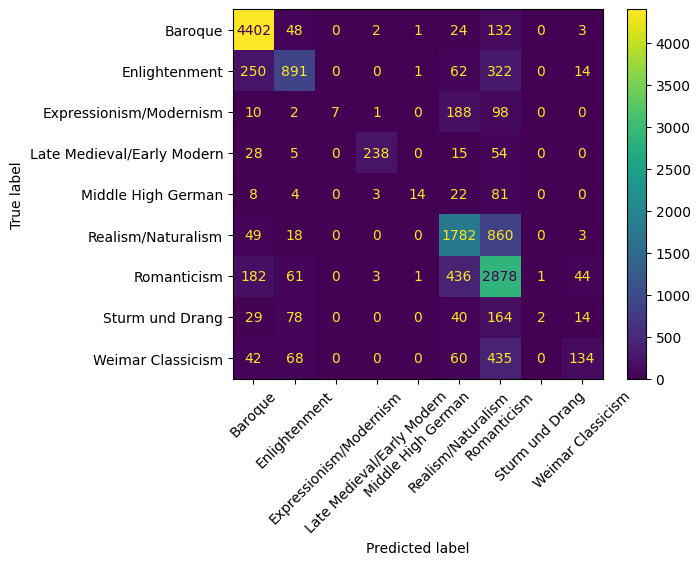

In [26]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

heat = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=movement_model.classes_)
fig, ax = plt.subplots()  # optional: adjust figure size
heat.plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

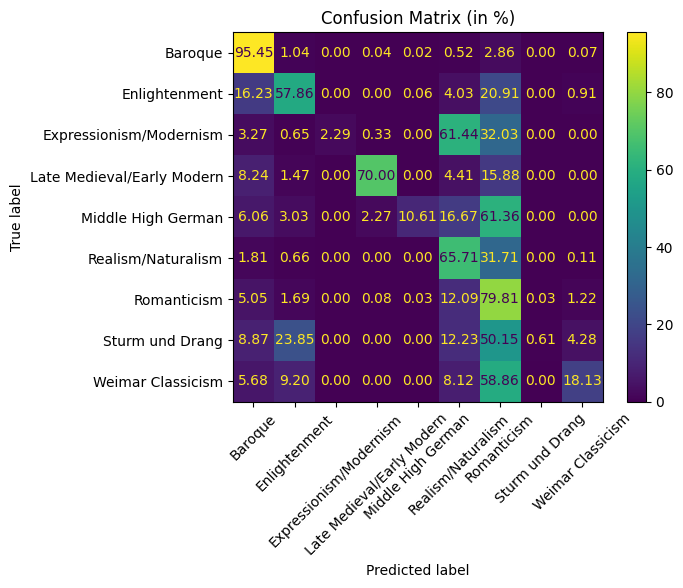

In [27]:
# Normalize it (row-wise percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=movement_model.classes_)
disp.plot(values_format='.2f')  # values_format to control decimal places
plt.title('Confusion Matrix (in %)')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Compare the results with the actual y values
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72
